In [4]:
pip install py4etrics

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 582.6 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 KB 1.9 MB/s eta 0:00:00 MB/s eta 0:00:01:01
Note: you may need to restart the kernel to use updated packages.


In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from py4etrics import tobit
import statsmodels.api as sm
import matplotlib.pyplot as plt
import os

In [10]:
df = pd.read_csv("/home/iiserb/Downloads/georgian_bay_secchi.csv")
df.head(15)



,secchi,date,depth,alkalinity,calcium,chlorophyll_a_corrected,chlorophyll_a_total,chlorophyll_b_total,chloride,color,...,nitrates_total,nitrogen,ph,phosphate,phosphorus_unfiltered,phosphorus_total,residue,silicates,sulphate,turbidity
0,4.1,27-Apr-04,21.7,36.30,12.40,1.000,0.500,0.100,6.20,14.80,...,0.289,0.190,7.890,0.001,0.004,5.4,0.50,1.10,8.90,0.310
1,4.0,10-Aug-04,21.8,43.75,14.40,2.333,3.400,0.133,6.35,6.55,...,0.140,0.220,8.005,0.001,0.008,5.7,0.90,0.48,10.00,0.610
2,5.3,27-Oct-04,21.9,47.65,16.00,2.000,2.700,0.100,6.30,6.20,...,0.201,0.200,7.945,0.001,0.007,5.3,0.50,0.37,10.35,0.285
3,6.3,26-Apr-05,20.2,54.25,17.85,1.000,0.600,0.100,7.65,5.50,...,0.240,0.180,8.010,0.001,0.006,2.3,0.50,1.14,11.30,0.085
4,4.4,26-Jul-05,20.8,66.05,22.75,2.000,2.933,0.200,8.70,4.05,...,0.176,0.210,8.240,0.001,0.004,4.4,1.00,0.80,11.00,0.370
5,9.0,26-Oct-05,20.6,73.25,22.95,1.000,1.100,0.100,7.00,1.20,...,0.215,0.180,8.180,0.001,0.005,2.8,0.50,0.78,13.50,0.220
6,4.6,28-Apr-04,8.8,59.20,19.60,1.000,0.733,0.100,5.40,9.30,...,0.271,0.180,8.110,0.001,0.002,3.8,0.60,0.82,12.50,0.330
7,5.2,11-Aug-04,9.5,68.75,22.30,1.000,1.467,0.100,5.90,1.10,...,0.126,0.200,8.305,0.001,0.012,3.9,0.80,0.60,13.50,1.015
8,7.3,26-Oct-04,8.9,71.95,23.20,1.000,0.900,0.100,6.10,1.50,...,0.254,0.185,8.145,0.001,0.005,4.4,0.60,1.22,13.20,0.365
9,4.9,27-Apr-04,23.2,45.10,15.20,1.000,0.867,0.100,6.20,9.30,...,0.298,0.180,8.010,0.001,0.006,4.1,0.50,0.92,10.50,0.190


In [11]:


# Check for missing values
missing_values = df.isnull().sum()

missing_values_count = missing_values[missing_values > 0]
total_missing_values = missing_values_count.sum()

print(missing_values_count)
print("\nTotal Missing Values: ", total_missing_values)



calcium                  16
conductivity_estimate    16
hardness                 16
potassium                16
magnesium                16
sodium                   16
dtype: int64

Total Missing Values:  96


In [12]:


len(df[df['secchi'].astype('str').str.contains(">")]) # number of censored observations



45

In [13]:
df['censored'] = np.where(df['secchi'].astype('str').str.contains(">"), 1, 0)
df['secchi_depth'] = df['secchi'].astype(str).str.replace(r"\>", "", regex=True).astype("float")
df['intercept'] = 1


In [14]:
features = list(df.drop(columns=['secchi', 'date', 'depth', 'censored', 'secchi_depth', 'intercept']).columns)



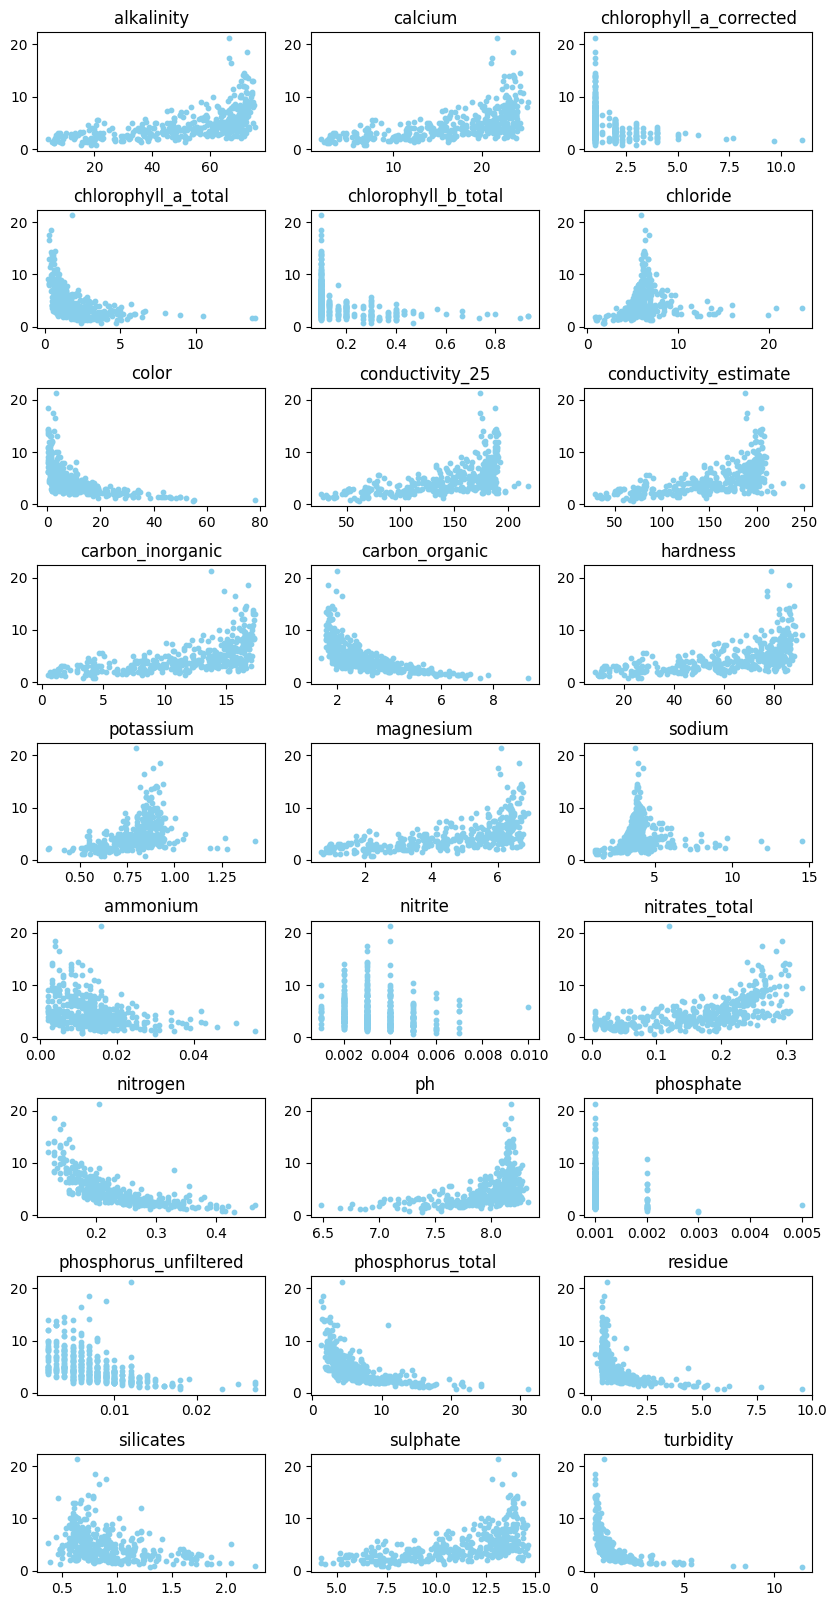

In [15]:
fig = plt.figure(figsize=(10, 20))
plt.subplots_adjust(hspace=0.5)
for i, col in enumerate(features):
    ax = fig.add_subplot(9,3, i+1)
    ax.scatter(df[col], df['secchi_depth'], color='skyblue', s=10)
    ax.set_title(col)


# MODEL

In [16]:
cens = df['censored'].values
endog = df['secchi_depth']
exog = df[['intercept','alkalinity', 'chloride', 'carbon_organic', 'nitrogen', 'sulphate']]

In [17]:
tobit_res = tobit.Tobit(endog, exog, cens).fit()
tobit_res.summary()

Optimization terminated successfully.
         Current function value: 1.932589
         Iterations: 700
         Function evaluations: 1054


<class 'statsmodels.iolib.summary.Summary'>
"""
                              Tobit Regression Results                             
===================================================================================
Dep. Variable:                secchi_depth   Pseudo R-squ:                    0.148
Method:                 Maximum Likelihood   Log-Likelihood:                 -780.8
No. Observations:                      404   LL-Null:                        -916.7
No. Uncensored Obs:                    359   LL-Ratio:                        271.8
No. Left-censored Obs:                   0   LLR p-value:                     0.000
No. Right-censored Obs:                 45   AIC:                            1573.5
Df Residuals:                          398   BIC:                            1597.5
Df Model:                                5   Covariance Type:             nonrobust
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept          8.1926      1.389      5.899      0.000       5.471      10.914
alkalinity         0.0375      0.023      1.624      0.104      -0.008       0.083
chloride           0.0359      0.060      0.601      0.548      -0.081       0.153
carbon_organic    -0.0364      0.235     -0.155      0.877      -0.497       0.424
nitrogen         -23.0158      3.609     -6.377      0.000     -30.089     -15.942
sulphate           0.0047      0.164      0.029      0.977      -0.316       0.325
Log(Sigma)         0.7515      0.037     20.269      0.000       0.679       0.824
==================================================================================
"""

In [18]:
ols_mod = sm.OLS(endog, exog)
ols_res = ols_mod.fit()
ols_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           secchi_depth   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     81.24
Date:                Wed, 15 Nov 2023   Prob (F-statistic):           1.25e-58
Time:                        16:57:06   Log-Likelihood:                -879.17
No. Observations:                 404   AIC:                             1770.
Df Residuals:                     398   BIC:                             1794.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept          8.9357      1.374      6.504      0.000       6.235      11.637
alkalinity         0.0390      0.023      1.716      0.087      -0.006       0.084
chloride           0.0260      0.059      0.440      0.660      -0.090       0.142
carbon_organic     0.0505      0.230      0.219      0.827      -0.402       0.503
nitrogen         -25.7125      3.465     -7.422      0.000     -32.524     -18.901
sulphate          -0.0441      0.161     -0.274      0.784      -0.360       0.272
==============================================================================
Omnibus:                      212.470   Durbin-Watson:                   1.523
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1737.946
Skew:                           2.098   Prob(JB):                         0.00
Kurtosis:                      12.254   Cond. No.                     1.85e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
tobit_params = pd.Series(index=ols_res.params.keys(), data=tobit_res.params[:-1])



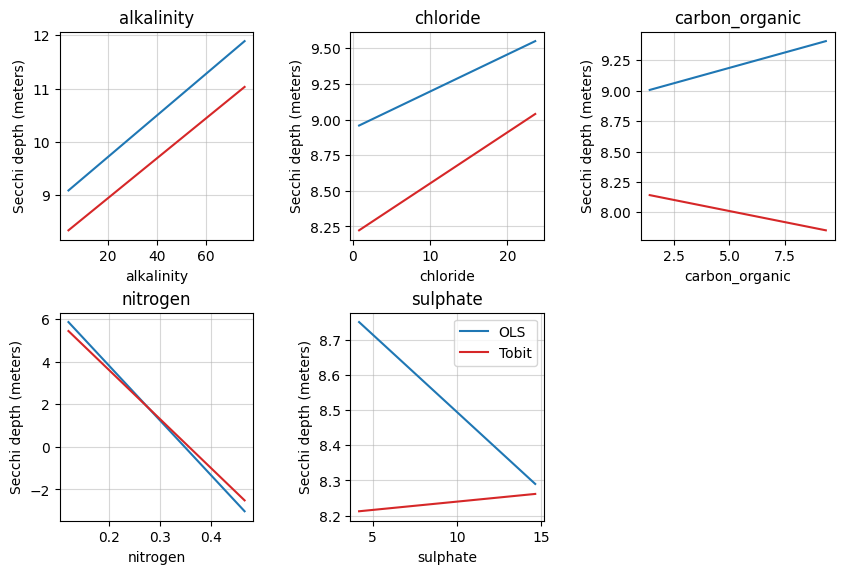

In [21]:
fig = plt.figure(figsize=(10, 10))
plt.subplots_adjust(hspace=0.35, wspace=0.5)
for i, col in enumerate(ols_res.params.keys()[1:]):
    ax = fig.add_subplot(3,3, i+1)
    
    x_min, x_max = df[col].min(), df[col].max()
    x = np.linspace(x_min, x_max, 100)
    y_ols = ols_res.params['intercept'] + x*ols_res.params[col]
    y_tobit = tobit_params['intercept'] + x*tobit_params[col]
    
    ax.plot(x, y_ols, color='tab:blue', label='OLS')
    ax.plot(x, y_tobit, color='tab:red', label='Tobit')
    ax.grid(alpha=0.5)
    ax.set_axisbelow(True)
    
    ax.set_xlabel(col)
    ax.set_ylabel('Secchi depth (meters)')
    
    ax.set_title(col)
plt.legend()



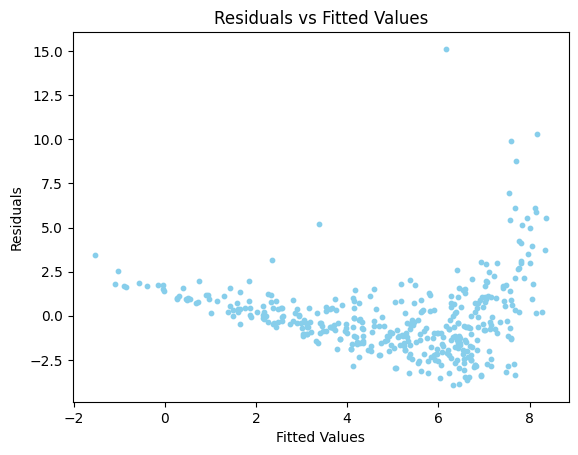

In [22]:
# Residual Analysis
residuals = tobit_res.resid
plt.scatter(tobit_res.fittedvalues, residuals, color='skyblue', s=10)
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()


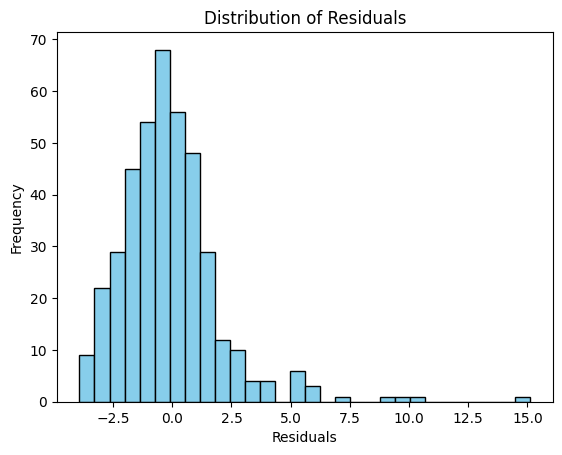

In [23]:
# Distribution of Residuals
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


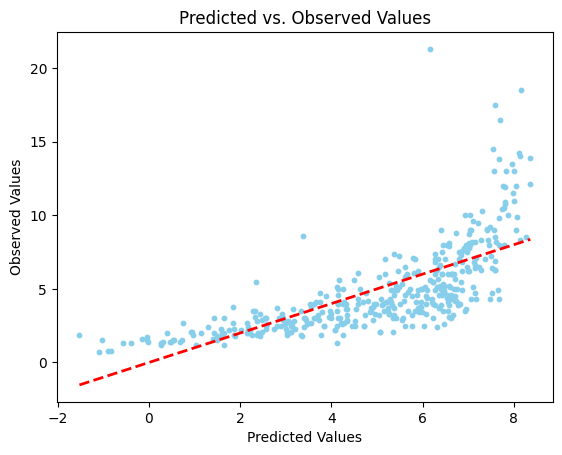

In [27]:
# Predicted vs. Observed Values
plt.scatter(tobit_res.fittedvalues, df['secchi_depth'], color='skyblue', s=10)
plt.plot([min(tobit_res.fittedvalues), max(tobit_res.fittedvalues)], [min(tobit_res.fittedvalues), max(tobit_res.fittedvalues)], linestyle='--', color='red', linewidth=2)
plt.title('Predicted vs. Observed Values')
plt.xlabel('Predicted Values')
plt.ylabel('Observed Values')
plt.show()


In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = exog.columns
vif_data["VIF"] = [variance_inflation_factor(exog.values, i) for i in range(exog.shape[1])]

print(vif_data)


         Variable         VIF
0       intercept  165.219485
1      alkalinity   18.330055
2        chloride    1.774055
3  carbon_organic    8.764784
4        nitrogen    4.669232
5        sulphate   16.805927


In [29]:
# Identify variables with high VIF
high_vif_vars = vif_data[vif_data['VIF'] > 10]['Variable']

# Drop variables with high VIF
exog_reduced = exog.drop(columns=high_vif_vars)

# Refit the Tobit model with reduced features
tobit_res_reduced = tobit.Tobit(endog, exog_reduced, cens).fit()
tobit_res_reduced.summary()


Optimization terminated successfully.
         Current function value: 2.325950
         Iterations: 145
         Function evaluations: 255


<class 'statsmodels.iolib.summary.Summary'>
"""
                              Tobit Regression Results                             
===================================================================================
Dep. Variable:                secchi_depth   Pseudo R-squ:                   -0.025
Method:                 Maximum Likelihood   Log-Likelihood:                 -939.7
No. Observations:                      404   LL-Null:                        -916.7
No. Uncensored Obs:                    359   LL-Ratio:                        -46.0
No. Left-censored Obs:                   0   LLR p-value:                     1.000
No. Right-censored Obs:                 45   AIC:                            1883.4
Df Residuals:                          401   BIC:                            1891.4
Df Model:                                2   Covariance Type:             nonrobust
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
chloride           0.6122      0.061     10.043      0.000       0.493       0.732
carbon_organic    -1.4004      0.259     -5.404      0.000      -1.908      -0.892
nitrogen          22.0781      4.593      4.807      0.000      13.077      31.080
Log(Sigma)         1.1790      0.037     32.209      0.000       1.107       1.251
==================================================================================
"""